In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot


In [3]:
df = pd.read_csv('placement.csv')
df.head()
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [4]:
# // steps

# // 0. preprocess + eda + feature analysis 
# // 1. extract input and output columns 
# // 2. scale the values 
# // 3. train test split 
# // 4. train the model 
# // 5. evaluate the model / model selection 
# // 6. deploy the model - int into a wesite

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df = df.iloc[:,1:]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


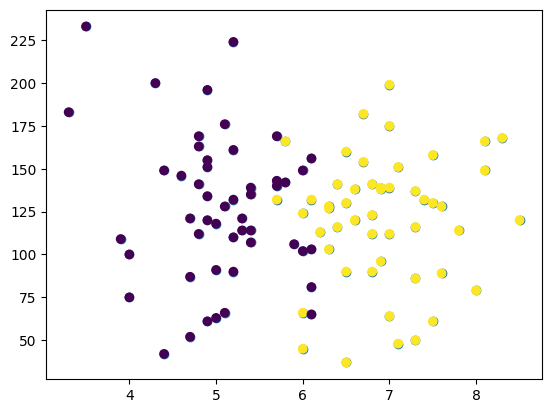

In [8]:
# eda
plot.scatter(df['cgpa'], df['iq'])
plot.scatter(df['cgpa'],df['iq'], c = df['placement'])

In [9]:
#  using logistic reg - cos linear data
X = df.iloc[:,0:2] #input features
y = df.iloc[:,-1] #target variable

In [10]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [13]:
X_train

,cgpa,iq
70,6.3,127.0
79,6.5,90.0
89,4.9,151.0
78,6.1,81.0
20,6.6,120.0
...,...,...
14,6.1,103.0
64,7.0,64.0
11,6.9,138.0
18,4.0,100.0


In [14]:
y_train

70    1
79    1
89    0
78    0
20    1
     ..
14    0
64    1
11    1
18    0
92    0
Name: placement, Length: 90, dtype: int64

In [15]:
X_test

,cgpa,iq
93,6.8,112.0
86,5.1,128.0
48,6.6,138.0
65,8.1,166.0
87,5.7,132.0
10,6.0,45.0
6,5.7,143.0
12,5.4,139.0
49,5.4,135.0
13,6.4,116.0


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()

In [18]:
X_train = sc.fit_transform(X_train)

In [19]:
X_train

array([[ 0.27752713,  0.08909943],
       [ 0.4491934 , -0.82102666],
       [-0.92413673,  0.67945149],
       [ 0.10586086, -1.04240868],
       [ 0.53502653, -0.08308659],
       [-0.75247047,  1.29440155],
       [ 1.13585846,  0.33507945],
       [ 1.82252352,  0.63025548],
       [-1.3533024 ,  0.63025548],
       [ 0.87835906,  0.38427546],
       [ 2.16585606, -0.08308659],
       [ 1.22169159,  0.21208944],
       [-0.23747167,  1.12221553],
       [ 0.10586086, -1.43597672],
       [ 1.99418979,  1.09761753],
       [-0.66663733,  2.47510566],
       [ 1.13585846, -1.80494675],
       [ 0.7066928 , -0.82102666],
       [-0.8383036 , -0.79642866],
       [-1.095803  , -0.05848858],
       [-0.75247047, -1.41137872],
       [ 0.27752713,  0.11369743],
       [-1.69663493, -1.18999669],
       [-1.00996987,  0.43347146],
       [ 1.30752473,  0.16289344],
       [-1.00996987, -0.27987061],
       [-0.5808042 , -0.2306746 ],
       [-2.12580059,  2.69648769],
       [-0.66663733,

In [20]:
X_test = sc.transform(X_test)

In [21]:

X_test

array([[ 0.7066928 , -0.27987061],
       [-0.75247047,  0.11369743],
       [ 0.53502653,  0.35967746],
       [ 1.82252352,  1.04842152],
       [-0.23747167,  0.21208944],
       [ 0.02002773, -1.92793677],
       [-0.23747167,  0.48266747],
       [-0.49497107,  0.38427546],
       [-0.49497107,  0.28588345],
       [ 0.36336026, -0.1814786 ]])

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [23]:
clf.fit(X_train, y_train)
# this is model training

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
y_prediction = clf.predict(X_test)

In [25]:
y_test

93    1
86    0
48    1
65    1
87    1
10    1
6     0
12    0
49    0
13    1
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
accuracy_score(y_test, y_prediction)

0.8

In [29]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

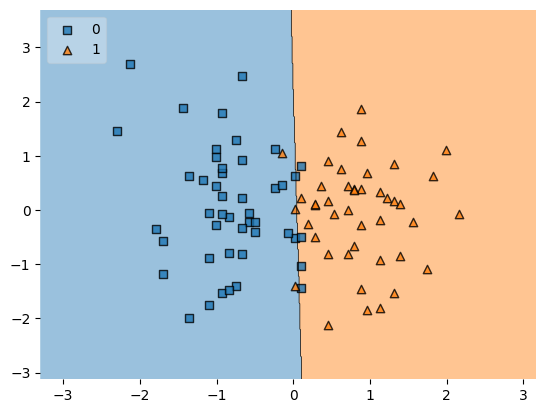

In [30]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [31]:
import pickle

In [32]:
pickle.dump(clf,open('model.pkl','wb'))